# Project 1: Exploratory Data Analysis of Movies
Amelia Dahm & Khyatee Desai

## Inspecting all the files

1. bom.movie_gross.csv.gz
2. imdb.title.ratings.csv.gz
3. imdb.name.basics.csv.gz
4. rt.movie_info.tsv.gz
5. imdb.title.akas.csv.gz
6. rt.reviews.tsv.gz
7. imdb.title.basics.csv.gz
8. tmdb.movies.csv.gz
9. imdb.title.crew.csv.gz
10. tn.movie_budgets.csv.gz
11. imdb.title.principals.csv.gz

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
%matplotlib inline

## movie gross - Table 1

In [3]:
movie_gross_raw = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
movie_gross_raw.head(1)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010


## IMDB ratings - Table 2

In [4]:
imdb_raw = pd.read_csv('./zippedData/imdb.title.ratings.csv.gz')
imdb_raw.head(1)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31


## name basics - Table 3

In [5]:
name_basics_raw = pd.read_csv('./zippedData/imdb.name.basics.csv.gz')
name_basics_raw.head(1)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"


## movie info - Table 4

In [6]:
movie_info_raw = pd.read_csv('./zippedData/rt.movie_info.tsv.gz',sep='\t')
movie_info_raw.head(1)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN


## movie titles - Table 5

In [7]:
titles_raw = pd.read_csv('./zippedData/imdb.title.akas.csv.gz')
titles_raw.head(1)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0


## RT reviews - Table 6

In [8]:
rt_raw = pd.read_csv('./zippedData/rt.reviews.tsv.gz',sep='\t', encoding = "ISO-8859-1")
rt_raw.head(1)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"


## Genres/Runtime - Table 7

In [9]:
genre_raw = pd.read_csv('./zippedData/imdb.title.basics.csv.gz')
genre_raw.head(1)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"


## TMDB Ratings - Table 8

In [10]:
tmdb_raw = pd.read_csv('./zippedData/tmdb.movies.csv.gz')
tmdb_raw.head(1)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788


## Directors/Writers - Table 9

In [11]:
crew_raw = pd.read_csv('./zippedData/imdb.title.crew.csv.gz')
crew_raw.head(1)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854


## Budgets - Table 10

In [12]:
budgets_raw = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
budgets_raw.head(1)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"


## Actors & Characters - Table 11

In [13]:
characters_raw = pd.read_csv('./zippedData/imdb.title.principals.csv.gz')
characters_raw.head(1)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"


## Raw Oscar Data - Table 12

In [14]:
oscars_raw = pd.read_csv('./zippedData/oscars.zip', encoding = "ISO-8859-1")
oscars_raw.head(1)

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False


# Question 1: Which Movies Get Oscar Nominations?
### Task: determine the commonalities among Academy award-nominated movies<br>

### External Datasets:
https://www.kaggle.com/unanimad/the-oscar-award
### Data of Interest:
- genre
- budget
- gross revenue
- online ratings
- oscar nominations

# Method:

## 1. Get the count of Oscar Nominations per movie

In [16]:

# subset the relevant data from Oscars df. Rename columns, drop rows with no movie title
oscars = oscars_raw.loc[:,['film','name', 'category']]
oscars.rename(columns={'film': 'title', 'name': 'person'}, inplace=True)
oscars.drop(oscars[oscars['title'].isnull()].index, inplace=True)


# create column for total number of oscar nominations per movie
counts = oscars['title'].value_counts()
d = counts.to_dict()
oscars['oscar_noms'] = oscars['title'].map(d)
oscars.head(3)

,title,person,category,oscar_noms
0,The Noose,Richard Barthelmess,ACTOR,1
1,The Last Command,Emil Jannings,ACTOR,2
2,A Ship Comes In,Louise Dresser,ACTRESS,1


## 2. Unstack the Genre values
genres were originally formatted as a comma-delimited string (ie 'Action, Crime, Drama'.) We reformatted this to give each genre its own row in the table.

In [17]:
# Unstacking Genre column to create individual rows (takes a while to run cell)
genre_ugly = genre_raw
genre_ugly['genres'] = genre_ugly['genres'].str.split(',', 3)
genre_unstack = genre_ugly.set_index('primary_title').genres.apply(pd.Series).stack().reset_index(level=-1, drop=True).astype(str).reset_index()
genre_unstack.columns = ['primary_title', 'genres']
genre_unstack

,primary_title,genres
0,Sunghursh,Action
1,Sunghursh,Crime
2,Sunghursh,Drama
3,One Day Before the Rainy Season,Biography
4,One Day Before the Rainy Season,Drama
...,...,...
229545,The Secret of China,War
229546,Kuambil Lagi Hatiku,Drama
229547,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary
229548,Dankyavar Danka,Comedy


## 3. Merge Oscars table with Genre table

In [18]:
#  using 'original_title' to retain more rows
oscar_genre = oscars.merge(genre_unstack, how = 'left', left_on='title', right_on='primary_title').drop('primary_title', axis=1)
oscar_genre

,title,person,category,oscar_noms,genres
0,The Noose,Richard Barthelmess,ACTOR,1,Documentary
1,The Last Command,Emil Jannings,ACTOR,2,NaN
2,A Ship Comes In,Louise Dresser,ACTRESS,1,NaN
3,7th Heaven,Janet Gaynor,ACTRESS,5,NaN
4,Sadie Thompson,Gloria Swanson,ACTRESS,1,NaN
...,...,...,...,...,...
15750,Parasite,"Screenplay by Bong Joon Ho, Han Jin Won; Story...",WRITING (Original Screenplay),6,Action
15751,Parasite,"Screenplay by Bong Joon Ho, Han Jin Won; Story...",WRITING (Original Screenplay),6,Horror
15752,Parasite,"Screenplay by Bong Joon Ho, Han Jin Won; Story...",WRITING (Original Screenplay),6,Sci-Fi
15753,Parasite,"Screenplay by Bong Joon Ho, Han Jin Won; Story...",WRITING (Original Screenplay),6,Drama


## 4. Prep Gross Revenue table

In [19]:
# subset relevant data, change strings to floats
movie_gross = movie_gross_raw.loc[:, ['title', 'domestic_gross', 'foreign_gross']]
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].str.replace(',','').astype(float)
movie_gross['total_gross'] = movie_gross.domestic_gross + movie_gross.foreign_gross
movie_gross

,title,domestic_gross,foreign_gross,total_gross
0,Toy Story 3,415000000.0,652000000.0,1.067000e+09
1,Alice in Wonderland (2010),334200000.0,691300000.0,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,9.603000e+08
3,Inception,292600000.0,535700000.0,8.283000e+08
4,Shrek Forever After,238700000.0,513900000.0,7.526000e+08
...,...,...,...,...
3382,The Quake,6200.0,NaN,NaN
3383,Edward II (2018 re-release),4800.0,NaN,NaN
3384,El Pacto,2500.0,NaN,NaN
3385,The Swan,2400.0,NaN,NaN


 ## 5. Prep Budgets table

In [20]:
# subset relevant data, change strings to floats
budgets = budgets_raw.loc[:,['movie', 'production_budget', 'domestic_gross', 'worldwide_gross']]
budgets.rename(columns={'movie': 'title', 'worldwide_gross':'foreign_gross'}, inplace=True)
budgets['production_budget'] = budgets['production_budget'].str.replace('$','')
budgets['production_budget'] = budgets['production_budget'].str.replace(',','').astype(float)
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace('$','')
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace(',','').astype(float)
budgets['foreign_gross'] = budgets['foreign_gross'].str.replace('$','')
budgets['foreign_gross'] = budgets['foreign_gross'].str.replace(',','').astype(float)
budgets

,title,production_budget,domestic_gross,foreign_gross
0,Avatar,425000000.0,760507625.0,2.776345e+09
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...
5777,Red 11,7000.0,0.0,0.000000e+00
5778,Following,6000.0,48482.0,2.404950e+05
5779,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,A Plague So Pleasant,1400.0,0.0,0.000000e+00


## 6. Concatenate Gross Revenue table with Budgets table

In [21]:
# concat gross and budget tables, create columns for total_gross and Return on Investment, drop duplicate rows
budget_concat = pd.concat([movie_gross, budgets])
budget_concat['total_gross'] = budget_concat.domestic_gross + budget_concat.foreign_gross
budget_concat['roi'] = (((budget_concat.total_gross - budget_concat.production_budget)/budget_concat.production_budget)* 100).round(2)
budget_concat.drop_duplicates(subset=['title'],keep='last', inplace=True)
budget_concat

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,domestic_gross,foreign_gross,production_budget,title,total_gross,roi
1,334200000.0,691300000.0,NaN,Alice in Wonderland (2010),1.025500e+09,NaN
2,296000000.0,664300000.0,NaN,Harry Potter and the Deathly Hallows Part 1,9.603000e+08,NaN
10,163200000.0,330000000.0,NaN,Clash of the Titans (2010),4.932000e+08,NaN
12,135500000.0,275400000.0,NaN,The King's Speech,4.109000e+08,NaN
13,172100000.0,228000000.0,NaN,Tron Legacy,4.001000e+08,NaN
...,...,...,...,...,...,...
5777,0.0,0.0,7000.0,Red 11,0.000000e+00,-100.00
5778,48482.0,240495.0,6000.0,Following,2.889770e+05,4716.28
5779,1338.0,1338.0,5000.0,Return to the Land of Wonders,2.676000e+03,-46.48
5780,0.0,0.0,1400.0,A Plague So Pleasant,0.000000e+00,-100.00


# 7. Final Oscar Nominations vs Genre vs Budget DataFrame

In [22]:
# subset the oscars table, drop duplicate listings
oscar_df = oscar_genre.loc[:,['title', "oscar_noms", 'genres']]
oscar_df.drop_duplicates(inplace=True)
oscar_df.sort_values('oscar_noms',ascending=False).head(15)

# join genre/oscar table with budgets.....
oscar_df = oscar_df.merge(budget_concat[['title','production_budget', "total_gross", 'roi']], on='title', how='left').set_index('title')
oscar_df.sort_values('oscar_noms', ascending=False).head(5)

,oscar_noms,genres,production_budget,total_gross,roi
title,,,,,
A Star Is Born,25,Romance,NaN,NaN,NaN
A Star Is Born,25,Drama,NaN,NaN,NaN
A Star Is Born,25,Music,NaN,NaN,NaN
Titanic,16,Family,200000000.0,2.867572e+09,1333.79
Titanic,16,Adventure,200000000.0,2.867572e+09,1333.79


## 8. Plotting Oscar Nominations vs Production Budget
## Khyatee TO DO: 
- remove outliers based on boxplot quartiles
- redraw charts
- draw conclusions

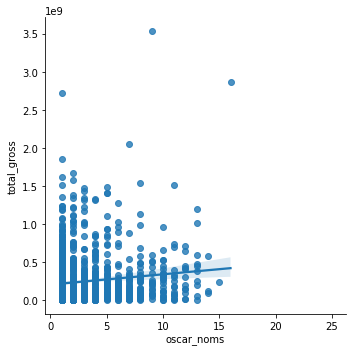

In [23]:
x ='oscar_noms'
y = 'total_gross'
# drop duplicates that exist because of genre unstacking (genre not relevant for this chart)
noms_vs_budget = oscar_df.loc[:,[x, y]].drop_duplicates()
sns.lmplot(x,y, data = noms_vs_budget)

## 9. Plotting Oscar Nominations per Genre

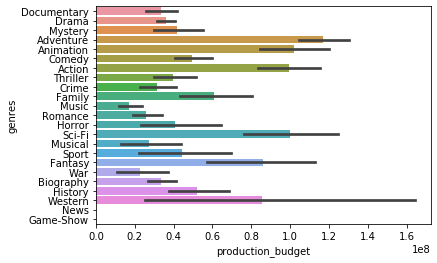

In [31]:
sns.barplot('production_budget','genres' , data = oscar_df)

# Question 2: How does Trailer Popularity impact Movie Success?
### Task: Compare movie trailer view counts to movie ratings and revenue

### Data of Interest:
- trailer views
- gross revenue
- online ratings

### Datasets:
https://grouplens.org/datasets/movielens/20m-youtube/

In [24]:
# slice year out of title string, merge with budgets table
trailers_raw = pd.read_csv('./zippedData/movie_trailers.zip')
trailers_raw['title'] = trailers_raw['title'].str[:-7]
trailers = trailers_raw.merge(budget_concat, on='title').sort_values('total_gross', ascending=False) #### remove this later
ids = list(trailers["youtubeId"].values[:])
trailers

,youtubeId,movieId,title,domestic_gross,foreign_gross,production_budget,total_gross,roi
2745,5MB3Ea6L-gw,72998,Avatar,760507625.0,2.776345e+09,425000000.0,3.536853e+09,732.20
459,yxIVO7P0iig,118916,Titanic,659363944.0,2.208208e+09,200000000.0,2.867572e+09,1333.79
458,dQ7MAigAhas,3404,Titanic,659363944.0,2.208208e+09,200000000.0,2.867572e+09,1333.79
457,2e-eXJ6HgkQ,1721,Titanic,659363944.0,2.208208e+09,200000000.0,2.867572e+09,1333.79
2799,TbQm5doF_Uc,106696,Frozen,400738009.0,1.272470e+09,150000000.0,1.673208e+09,1015.47
...,...,...,...,...,...,...,...,...
4012,myjar5KoqZA,129820,Spare Parts,3600000.0,NaN,NaN,NaN,NaN
4017,utmvmr7cgcg,130052,Clown,55000.0,NaN,NaN,NaN,NaN
4020,tRn3gr8Pt_o,130382,Mr. Pip,1700.0,NaN,NaN,NaN,NaN
4028,6uaWekLrilY,131023,That Sugar Film,3500.0,NaN,NaN,NaN,NaN


## Create function to feed in youtube id's of trailers and retrieve view counts

In [28]:

def getViews(youtubeIDs):
    views = []
    for i in youtubeIDs:
        try:
            url = "https://www.youtube.com/watch?v={}".format(i)
            html_page = requests.get(url) 
            soup = BeautifulSoup(html_page.text, 'html.parser')
            script = soup.find_all('script')[32]
            value = re.findall('ewCount":{"simpleText":"([\d,]+) views', str(soup))
            views.append(float(value[0].replace(',','')))
        except:
            views.append(0)
    return views


## Scrape all YouTube Trailers and save as CSV (Warning: takes ~1hr to run)
### Leave this commented out

In [29]:
# trailers['trailer_views'] = getViews(ids)
# trailers.to_csv('zippedData/trailerViews.csv')

# Final Trailer Views vs ROI DataFrame

In [30]:
# sort by trailer views and drop duplicates to keep only trailer with highest views
trailer_df = pd.read_csv('zippedData/trailerViews.csv')
trailer_df = trailer_df.loc[:,['title','youtubeId','production_budget', 'total_gross', 'roi', 'trailer_views']].sort_values('trailer_views', ascending=False)
trailer_df = trailer_df.drop_duplicates(subset= ['title'], keep='first').set_index('title')
trailer_df

FileNotFoundError: [Errno 2] File b'zippedData/trailerViews.csv' does not exist: b'zippedData/trailerViews.csv'

In [31]:
sns.lmplot('trailer_views', 'total_gross', data = trailer_df)

NameError: name 'trailer_df' is not defined

# Question 3: Do Music Scores Contribute to Movie Success?
### Task: Look at how music score ratings compare to movie ratings and ROI
### Data of Interest:
- Composers
- Music Score Rating
- Average Movie Rating
- TMDB rating
- IMDB rating
- ROI

### Datasets: 
- https://www.soundtrack.net/content/reviews/ (not sure if we will end up using this one)
- http://www.movie-wave.net/reviews-by-composer/


## TMDB Ratings merged with Budget/ROI table - ADD MUSIC DATA TO THESE?

In [ ]:
# Rename columns to specify TMDB, and subset data to only get columns of interest
tmdb = tmdb_raw.merge(budget_concat[['title', 'total_gross','production_budget', 'roi']], on='title', how='left')
tmdb.rename(columns ={'popularity':'tmdb_popularity', 'vote_average': 'tmdb_rating', 'vote_count': 'tmdb_votes'}, inplace=True)
tmdb.loc[:,['title', 'tmdb_rating', 'tmdb_votes', 'tmdb_popularity', 'total_gross', 'production_budget', 'roi']]

## IMDB merged with Revenue

In [33]:
# To retain as much info as possible, joined imdb_ratings with title table rather than title_basics
imdb_merge = imdb_raw.merge(title,left_on ='tconst', right_on ='title_id')
imdb_merge = imdb_merge.merge(movie_gross_raw[['title', 'domestic_gross', 'foreign_gross']], on='title', how='left')
imdb_merge.rename(columns ={'averagerating':'imdb_rating', 'numvotes': 'imdb_votes'}, inplace=True)
imdb_merge = imdb_merge[['title_id', 'title', 'imdb_rating', 'imdb_votes','domestic_gross', 'foreign_gross' ]]
imdb_merge

## Scrape music reviews page

In [34]:
page = requests.get("http://www.movie-wave.net/reviews-by-title/")
soup = BeautifulSoup(page.content, 'html.parser')
content =soup.find('div', class_="page-content")
p_list = content.findAll('p')

In [35]:
to_df =[]
for p in p_list:
    for a in p.findAll('a'):
        try:
           to_df.append([a.text, a.nextSibling, a.nextSibling.nextSibling.text])
        except:
            pass
to_df

[['10 Cloverfield Lane', ' Bear McCreary (2016) ', '****'],
 ['100 Rifles', ' Jerry Goldsmith (1969) ', '****'],
 ['101 Dalmatians', ' Michael Kamen (1996) ', '**** 1/2'],
 ['102 Dalmatians', ' David Newman (2000) ', '****'],
 ['10,000BC', ' Harald Kloser and Thomas Wander (2008) ', '**'],
 ['13 Hours: The Secret Soldiers of Benghazi', ' Lorne Balfe (2016) ', '***'],
 ['The 13th Warrior', ' Jerry Goldsmith (1999) ', '****'],
 ['1408', ' Gabriel Yared (2007) ', '**'],
 ['1917', ' Thomas Newman (2019) ', '**'],
 ['2 Days in the Valley', ' Jerry Goldsmith (1996) ', '*** 1/2'],
 ['2012', ' Harald Kloser and Thomas Wander (2009) ', '*'],
 ['2012: Supernova – The Sci-Fi Film Music of Chris Ridenhour',
  ' Chris Ridenhour (2011 compilation) ',
  '***'],
 ['21 Grams', ' Gustavo Santaolalla (2003) ', '*'],
 ['24', ' Sean Callery (2001) ', '**'],
 ['24 Seasons Four and Five', ' Sean Callery (2005) ', '***'],
 ['27 Dresses', ' Randy Edelman (2008) ', '***'],
 ['28 Days', ' Richard Gibbs (2000) ',

## Add Composers and Ratings to a DataFrame

In [36]:
music_df = pd.DataFrame(to_df, columns=['title', 'composer', 'music_rating'])
music_df['composer'] = music_df['composer'].str[:-7]

In [37]:
stars = list(music_df.music_rating)
mapper = {'*****':5, '**** 1/2':4.5,'****':4,'*** 1/2':3.5,'***':3,'** 1/2':2.5,'**':2,'* 1/2':1.5,'*':1}
ratings = list(map(mapper.get, stars))
music_df['rating'] = ratings
music_df = music_df.drop('music_rating',axis=1)
music_df

,title,composer,rating
0,10 Cloverfield Lane,Bear McCreary,4.0
1,100 Rifles,Jerry Goldsmith,4.0
2,101 Dalmatians,Michael Kamen,4.5
3,102 Dalmatians,David Newman,4.0
4,"10,000BC",Harald Kloser and Thomas Wander,2.0
...,...,...,...
2294,Zathura,John Debney,4.0
2295,Zero Dark Thirty,Alexandre Desplat,4.0
2296,Zoolander 2,Theodore Shapiro,3.5
2297,Zootopia,Michael Giacchino,2.0



## Movie ROI's by Genre

In [3]:
gross = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

### Clean data and Computer ROI

In [4]:
gross['year'] = gross['release_date'].str[-4:].astype(float)
gross['domestic_gross'] = gross['domestic_gross'].str.replace(',', '')
gross['domestic_gross'] = gross['domestic_gross'].str.replace('$', '').astype(float)
gross['production_budget'] = gross['production_budget'].str.replace(',', '')
gross['production_budget'] = gross['production_budget'].str.replace('$', '').astype(float)
gross['worldwide_gross'] = gross['worldwide_gross'].str.replace(',', '')
gross['worldwide_gross'] = gross['worldwide_gross'].str.replace('$', '').astype(float)

In [5]:
gross['ROI'] = (((gross['worldwide_gross'] - gross['production_budget']) / gross['production_budget'] ) * 100)

In [6]:
gross.rename(columns = {'movie': 'original_title'}, inplace=True)

In [7]:
gross.set_index('original_title')

,id,release_date,production_budget,domestic_gross,worldwide_gross,year,ROI
original_title,,,,,,,
Avatar,1,"Dec 18, 2009",425000000.0,760507625.0,2.776345e+09,2009.0,553.257713
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011",410600000.0,241063875.0,1.045664e+09,2011.0,154.667286
Dark Phoenix,3,"Jun 7, 2019",350000000.0,42762350.0,1.497624e+08,2019.0,-57.210757
Avengers: Age of Ultron,4,"May 1, 2015",330600000.0,459005868.0,1.403014e+09,2015.0,324.384139
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017",317000000.0,620181382.0,1.316722e+09,2017.0,315.369636
...,...,...,...,...,...,...,...
Red 11,78,"Dec 31, 2018",7000.0,0.0,0.000000e+00,2018.0,-100.000000
Following,79,"Apr 2, 1999",6000.0,48482.0,2.404950e+05,1999.0,3908.250000
Return to the Land of Wonders,80,"Jul 13, 2005",5000.0,1338.0,1.338000e+03,2005.0,-73.240000


### Stack Genre DataFrame and Merge with Financial Data

In [8]:
genre_raw = pd.read_csv('./zippedData/imdb.title.basics.csv.gz')
genre_raw

genre_ugly = genre_raw
genre_ugly['genres'] = genre_ugly['genres'].str.split(',', 3)
genre_unstack = genre_ugly.set_index('original_title').genres.apply(pd.Series).stack().reset_index(level=-1, drop=True).astype(str).reset_index()
genre_unstack.columns = ['original_title', 'genres']

In [9]:
genre_roi = genre_unstack.merge(gross[['original_title', 'ROI']], on='original_title', how='left')

In [10]:
genre_roi.dropna(axis = 0, inplace = True)

### Bar Chart Displaying Musicals Having Highest Average ROI

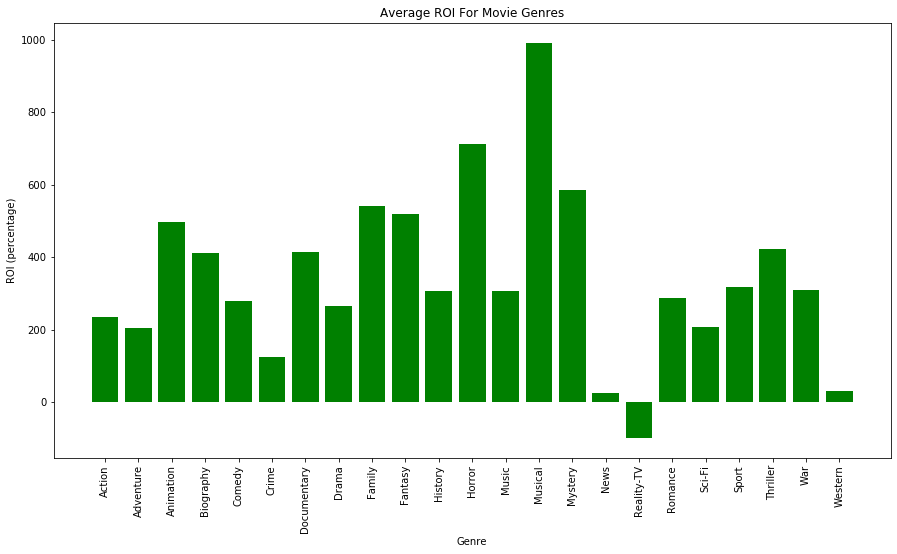

In [11]:
y = genre_roi.groupby(['genres'])['ROI'].mean()
x = y.index

figure, ax = plt.subplots(figsize = (15,8))

ax.set_title('Average ROI For Movie Genres')
ax.set_xlabel('Genre')
ax.set_ylabel('ROI (percentage)')

plt.xticks(rotation=90)

ax.bar(x, y, color='green');

## Compiling for Composer Dataframe

### Stack Column Listing Movie IDs for Each Crew Member

In [ ]:
crew_raw = pd.read_csv('./zippedData/imdb.title.crew.csv.gz')
crew_raw

crew = crew_raw
crew['directors'] = crew['directors'].str.split(',', 5)
crew_unstack = crew.set_index('tconst').directors.apply(pd.Series).stack().reset_index(level=-1, drop=True).astype(str).reset_index()
crew_unstack.columns = ['tconst', 'id']

### Stack Column Listing Roles a Crew Member Held in Production

In [ ]:
name_basics_raw = pd.read_csv('./zippedData/imdb.name.basics.csv.gz')
name_basics_raw.rename(columns = {'nconst' : 'directors', 'title_id':'tconst'}, inplace=True)
name_basics_raw

name_basics = name_basics_raw
name_basics['primary_profession'] = name_basics['primary_profession'].str.split(',', 5)
name_basics_unstack = name_basics.set_index('directors').primary_profession.apply(pd.Series).stack().reset_index(level=-1, drop=True).astype(str).reset_index()

In [ ]:
name_basics_unstack.columns = ['id', 'job_title']

In [ ]:
name_basics.rename(columns={'directors':'id'}, inplace=True)

#### Pulling in Data and Matching indices to Merge

In [ ]:
titles_raw = pd.read_csv('./zippedData/imdb.title.akas.csv.gz')
titles_raw.rename(columns = {'title_id':'tconst', 'title' : 'original_title'}, inplace=True)

In [ ]:
roi_with_title = genre_roi.merge(titles_raw[['original_title', 'tconst']], on='original_title', how='inner')
roi_with_title.drop_duplicates(inplace=True)

In [ ]:
composer = name_basics_unstack[name_basics_unstack['job_title'] == 'composer']

In [ ]:
composers = crew_unstack.merge(composer[['id', 'job_title']], on='id', how='left')
composers.dropna(inplace=True)
composers.set_index('id', inplace=True)

In [ ]:
composers_names = composer.merge(name_basics[['id', 'primary_name']], on='id', how='left')

In [ ]:
composers_names.set_index('primary_name')

In [ ]:
crew = crew_unstack.merge(name_basics_raw[['id', 'primary_name']], on='id', how='left')

In [ ]:
roi_crew_genre = roi_with_title.merge(crew[['tconst', 'primary_name']], on='tconst', how='left')
roi_crew_genre.drop_duplicates(inplace=True)
roi_crew_genre.set_index('primary_name')

In [ ]:
composer_ = roi_crew_genre.merge(composers_names[['job_title', 'primary_name']], on='primary_name', how='inner')

In [ ]:
imdb_raw = pd.read_csv('./zippedData/imdb.title.ratings.csv.gz')

In [ ]:
composer_df = composer_.merge(imdb_raw[['tconst', 'averagerating']], on='tconst', how='left')
composer_df